## 회귀나무

### 관련 라이브러리 호출

In [1]:
# 관련 라이브러리를 호출합니다.
import os
import joblib
import numpy as np
import pandas as pd
from GraphicSetting import *
import hds_stats as hds

### 실습 데이터셋 준비

In [2]:
# 현재 작업 경로를 확인합니다.
os.getcwd()

'/Users/hdsceokevin/Documents/Lectures/Python/MachineLearning/code'

In [3]:
# data 폴더로 작업 경로를 변경합니다.
os.chdir(path = '../data')

In [4]:
# 현재 작업 경로에 있는 폴더명과 파일명을 출력합니다.
os.listdir()

['Used_Cars_Price.z', 'Univ_Admit.z']

In [5]:
# 회귀모형 실습 데이터셋을 호출합니다.
df = joblib.load(filename = 'Used_Cars_Price.z')

### 입력변수 행렬과 목표변수 벡터로 분리

In [13]:
# df의 처음 5행을 출력합니다.
df.head()

,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight,FuelType_CNG,FuelType_Diesel,FuelType_Petrol
0,13500,23,46986,90,1,0,2000,3,1165,False,True,False
1,13750,23,72937,90,1,0,2000,3,1165,False,True,False
2,13950,24,41711,90,1,0,2000,3,1165,False,True,False
3,14950,26,48000,90,0,0,2000,3,1165,False,True,False
4,13750,30,38500,90,0,0,2000,3,1170,False,True,False


In [14]:
# 목표변수명을 yvar에 할당합니다.
yvar = 'Price'

In [15]:
# 데이터프레임을 입력변수 행렬과 목표변수 벡터로 분리합니다.
X = df.drop(columns = yvar)
y = df[yvar].copy()

### 실습 데이터셋 분할

In [16]:
# 관련 라이브러리를 호출합니다.
from sklearn.model_selection import train_test_split

In [17]:
# 전체 데이터셋의 80%를 훈련셋, 20%를 검증셋으로 분할합니다.
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size = 0.2, random_state = 0
)

### 훈련셋과 검증셋 확인

In [18]:
# 훈련셋 입력변수 행렬의 크기를 확인합니다.
X_train.shape

(1014, 11)

In [19]:
# 검증셋 입력변수 행렬의 크기를 확인합니다.
X_valid.shape

(254, 11)

In [20]:
# 훈련셋 목표변수의 평균을 확인합니다.
y_train.mean()

9702.940828402367

In [21]:
# 검증셋 목표변수의 평균을 확인합니다.
y_valid.mean()

9672.53937007874

### 가지치기 전 회귀모형 적합

In [22]:
# 관련 라이브러리를 호출합니다.
from sklearn.tree import DecisionTreeRegressor

In [23]:
# 가지치기 전 회귀모형을 설정합니다.
model = DecisionTreeRegressor(
    min_samples_split = 50,
    min_samples_leaf = 25,
    random_state = 0
)

In [24]:
# 훈련셋으로 가지치기 전 회귀모형을 적합합니다.
model.fit(X = X_train, y = y_train)

DecisionTreeRegressor(min_samples_leaf=25, min_samples_split=50, random_state=0)

In [25]:
# 가지치기 전 회귀모형의 파라미터를 확인합니다.
model.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 25,
 'min_samples_split': 50,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 0,
 'splitter': 'best'}

In [28]:
# 가지치기 전 회귀모형의 훈련셋 결정계수를 확인합니다.
model.score(X = X_train, y = y_train)

0.752958254525769

In [29]:
# 가지치기 전 회귀모형의 검증셋 결정계수를 확인합니다.
model.score(X = X_valid, y = y_valid)

0.7062901124110719

### 간단한 방법으로 나무모형 시각화

In [30]:
# 관련 라이브러리를 호출합니다.
from sklearn.tree import plot_tree

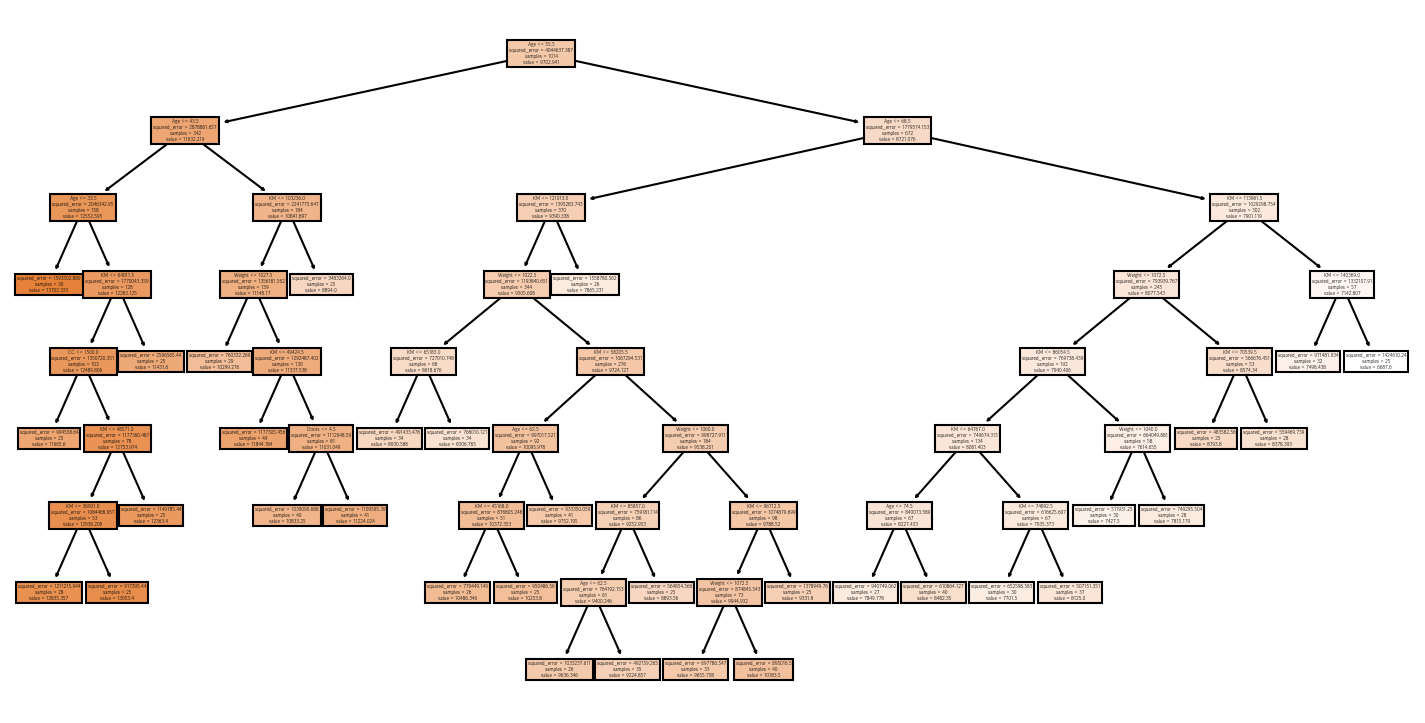

In [31]:
# 현재 셀에 적용할 그래프 크기(인치)와 해상도를 설정합니다.
plt.figure(figsize = (12, 6), dpi = 150)

# 가지치기 전 회귀모형을 시각화합니다.
plot_tree(decision_tree = model, 
          feature_names = list(X_train.columns), 
          filled = True);

### 가지치기 전 회귀모형 시각화

In [32]:
# image 폴더로 작업 경로를 변경합니다.
os.chdir(path = '../image')

In [33]:
# graphviz로 가지치기 전 회귀모형을 png 파일로 저장합니다.
hds.ml.plot_tree(model = model, fileName = 'dtr1')

In [34]:
# 관련 라이브러리를 호출합니다.
from IPython.display import Image

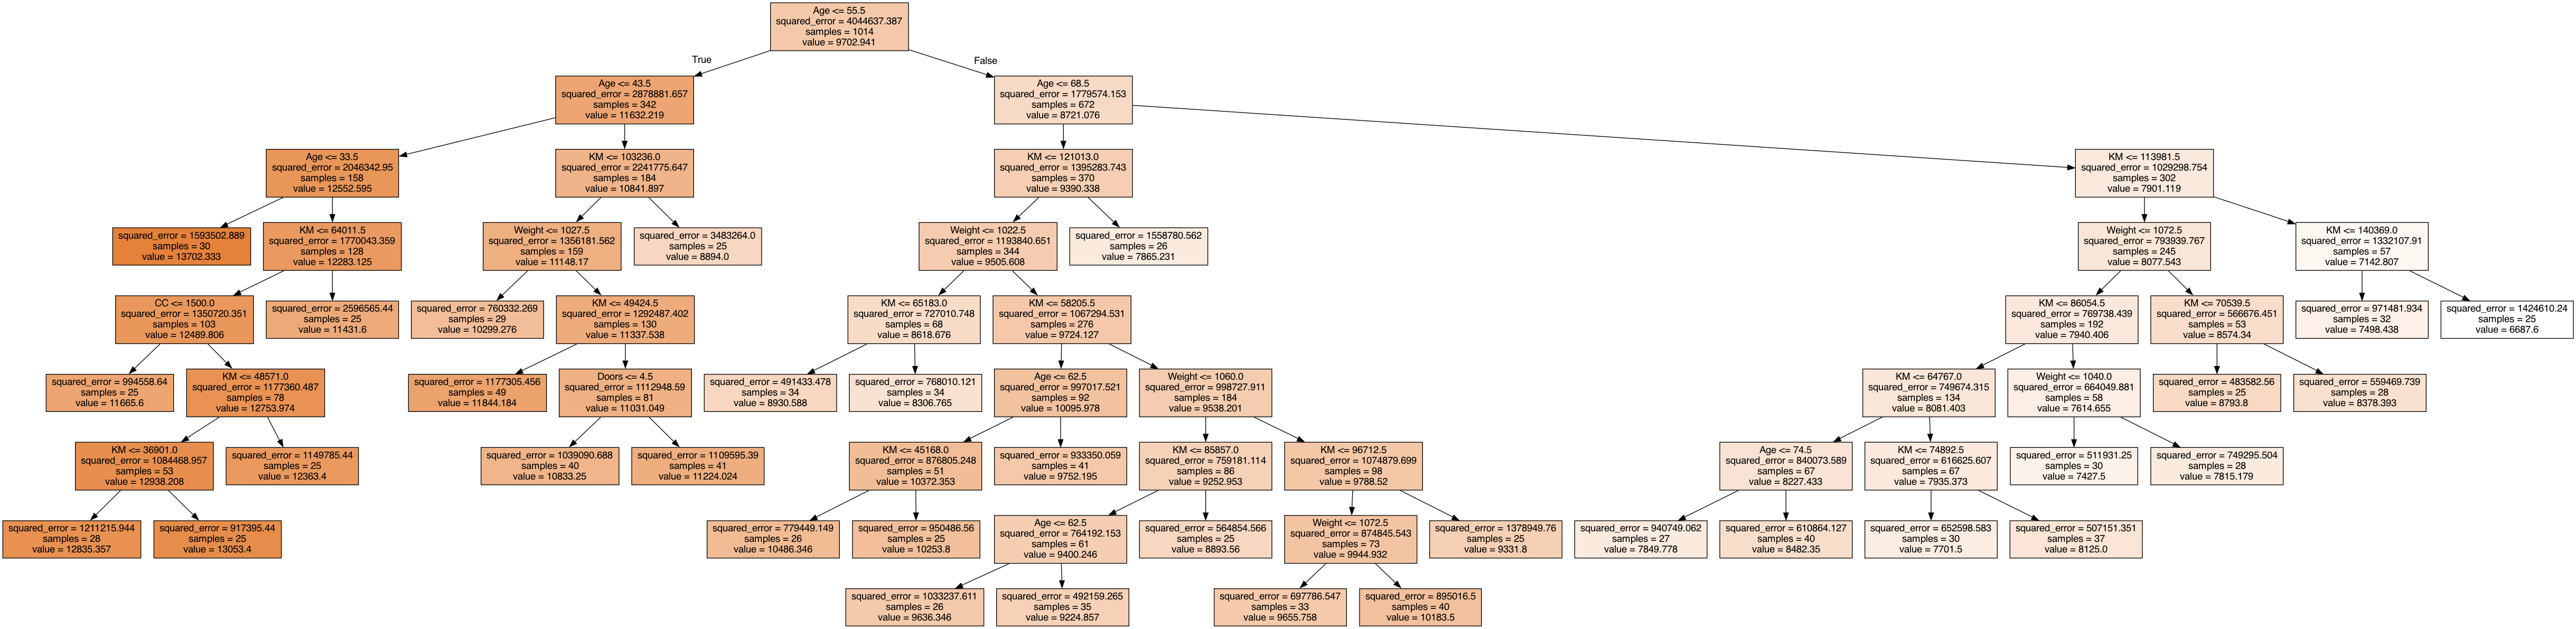

In [35]:
# png 파일을 Jupyter Notebook에 렌더링합니다.
Image(data = 'dtr1.png')

### 나무모형의 크기 확인

In [ ]:
# 가지치기 전 분류모형의 깊이를 확인합니다.
model.get_depth()

In [ ]:
# 가지치기 전 분류모형의 끝마디 개수를 확인합니다.
model.get_n_leaves()

### 가지치기 전 회귀모형 특성 중요도

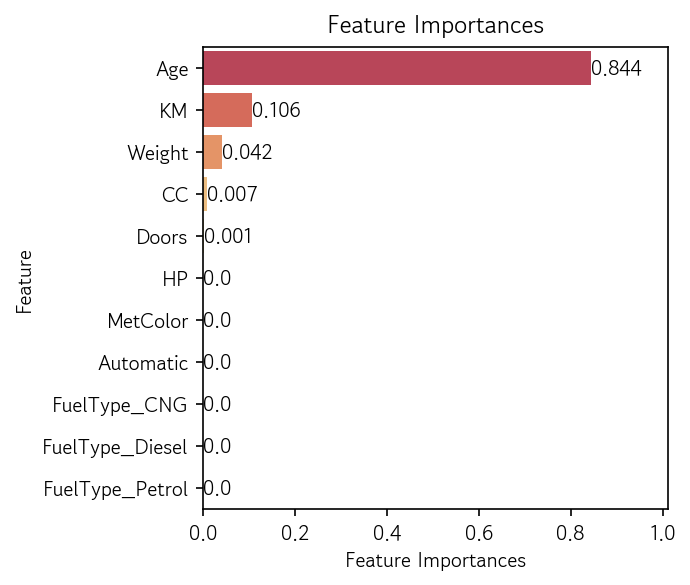

In [36]:
# 가지치기 전 회귀모형 특성 중요도로 막대 그래프를 그립니다.
hds.ml.plot_feature_importance(model = model, pal = 'Spectral')

### 회귀모형 성능 평가

In [37]:
# 가지치기 전 회귀모형의 검증셋 추정값을 생성합니다.
y_vpred1 = model.predict(X = X_valid)

In [38]:
# 가지치기 전 회귀모형의 성능지표를 출력합니다.
hds.stat.regmetrics(y_true = y_valid, y_pred = y_vpred1)

,MSE,RMSE,MSLE,RMSLE,MAE,MAPE
0,1.289419e+06,1135.525997,0.014303,0.119596,876.467769,0.092953


### 나무모형 가지치기 경로 확인

In [39]:
# 나무모형의 가지치기 단계별 비용 복잡도 파라미터와 총분산을 생성합니다.
path = model.cost_complexity_pruning_path(X = X_train, y = y_train)

In [40]:
# path를 데이터프레임으로 변환합니다.
path = pd.DataFrame(data = path)

In [41]:
# path를 출력합니다.
path

,ccp_alphas,impurities
0,0.000000e+00,9.991943e+05
1,6.192527e+02,9.998135e+05
2,6.797098e+02,1.000493e+06
3,2.146629e+03,1.002640e+06
4,2.247668e+03,1.004888e+06
5,2.491094e+03,1.007379e+06
6,2.930334e+03,1.010309e+06
7,3.049110e+03,1.013358e+06
8,4.489635e+03,1.017848e+06
9,4.589572e+03,1.027027e+06


In [42]:
# path의 열이름을 변경합니다.
path.columns = ['alpha', 'variance']

### 나무모형 가지치기 경로 시각화

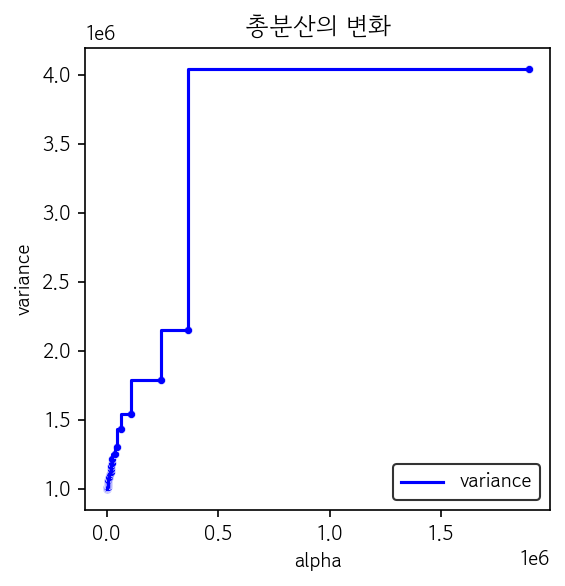

In [43]:
# alpha와 총분산으로 단계 그래프를 그립니다.
hds.ml.plot_step(data = path, x = 'alpha', y = 'variance')
plt.title(label = '총분산의 변화');

### 최적의 나무모형 탐색

In [44]:
# 관련 라이브러리를 호출합니다.
from sklearn.base import clone

In [45]:
# 복제 모형을 저장할 빈 리스트를 생성합니다.
trees = []

In [46]:
# 반복문으로 alpha를 바꿔가면서 복제 모형을 리스트에 추가합니다.
for alpha in path['alpha']:
    tree = clone(estimator = model)
    tree.set_params(ccp_alpha = alpha)
    tree.fit(X = X_train, y = y_train)
    trees.append(tree)

In [47]:
# 복제 모형의 깊이, 끝마디 개수, 훈련셋과 검증셋 결정계수를 path에 추가합니다.
path['depth'] = [t.get_depth() for t in trees]
path['leaves'] = [t.get_n_leaves() for t in trees]
path['train_scores'] = [t.score(X = X_train, y = y_train) for t in trees]
path['valid_scores'] = [t.score(X = X_valid, y = y_valid) for t in trees]

In [48]:
# path의 처음 10행을 출력합니다.
path.head(n = 10)

,alpha,variance,depth,leaves,train_scores,valid_scores
0,0.000000,9.991943e+05,8,33,0.752958,0.706290
1,619.252750,9.998135e+05,8,32,0.752805,0.706380
2,679.709825,1.000493e+06,8,31,0.752637,0.704954
3,2146.628695,1.002640e+06,8,30,0.752106,0.704410
4,2247.667858,1.004888e+06,8,29,0.751551,0.704698
5,2491.093828,1.007379e+06,8,28,0.750935,0.703101
6,2930.333503,1.010309e+06,8,27,0.750210,0.705312
7,3049.109790,1.013358e+06,8,26,0.749456,0.709263
8,4489.635446,1.017848e+06,8,25,0.748346,0.706932
9,4589.572387,1.027027e+06,8,23,0.746077,0.709575


### 최적의 나무모형 탐색 결과 시각화

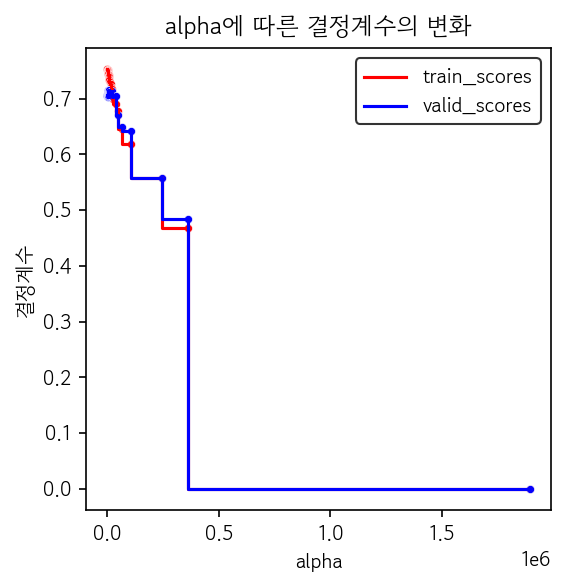

In [49]:
# 훈련셋과 검증셋 정확도로 단계 그래프를 그립니다.
hds.ml.plot_step(data = path, x = 'alpha', y = 'train_scores', color = 'red')
hds.ml.plot_step(data = path, x = 'alpha', y = 'valid_scores', color = 'blue')
plt.title(label = 'alpha에 따른 결정계수의 변화')
plt.ylabel(ylabel = '결정계수');

### 최적의 파라미터 탐색

In [50]:
# 검증셋 결정계수가 최댓값인 인덱스를 locs에 할당합니다.
locs = np.where(path['valid_scores'].eq(path['valid_scores'].max()))

In [51]:
# locs의 첫 번째 원소를 출력합니다.
locs[0]

array([12])

In [52]:
# 검증셋 결정계수가 최댓값일 때의 alpha를 best_alpha에 할당합니다.
best_alpha = path['alpha'][locs[0][-1]]
best_alpha

6524.308214407902

### 가지치기 후 회귀모형 적합

In [53]:
# 기존 모형에 best_alpha를 설정합니다.
model.set_params(ccp_alpha = best_alpha)

DecisionTreeRegressor(ccp_alpha=6524.308214407902, min_samples_leaf=25,
                      min_samples_split=50, random_state=0)

In [54]:
# 훈련셋으로 가지치기 후 회귀모형을 적합합니다.
model.fit(X = X_train, y = y_train)

DecisionTreeRegressor(ccp_alpha=6524.308214407902, min_samples_leaf=25,
                      min_samples_split=50, random_state=0)

In [58]:
# 가지치기 후 회귀모형의 훈련셋 결정계수를 확인합니다.
model.score(X = X_train, y = y_train)

0.7418673723892661

In [59]:
# 가지치기 후 회귀모형의 검증셋 결정계수를 확인합니다.
model.score(X = X_valid, y = y_valid)

0.7161816646304318

### 가지치기 후 회귀모형 시각화

In [60]:
# graphviz로 가지치기 후 회귀모형을 png 파일로 저장합니다.
hds.ml.plot_tree(model = model, fileName = 'dtr2')

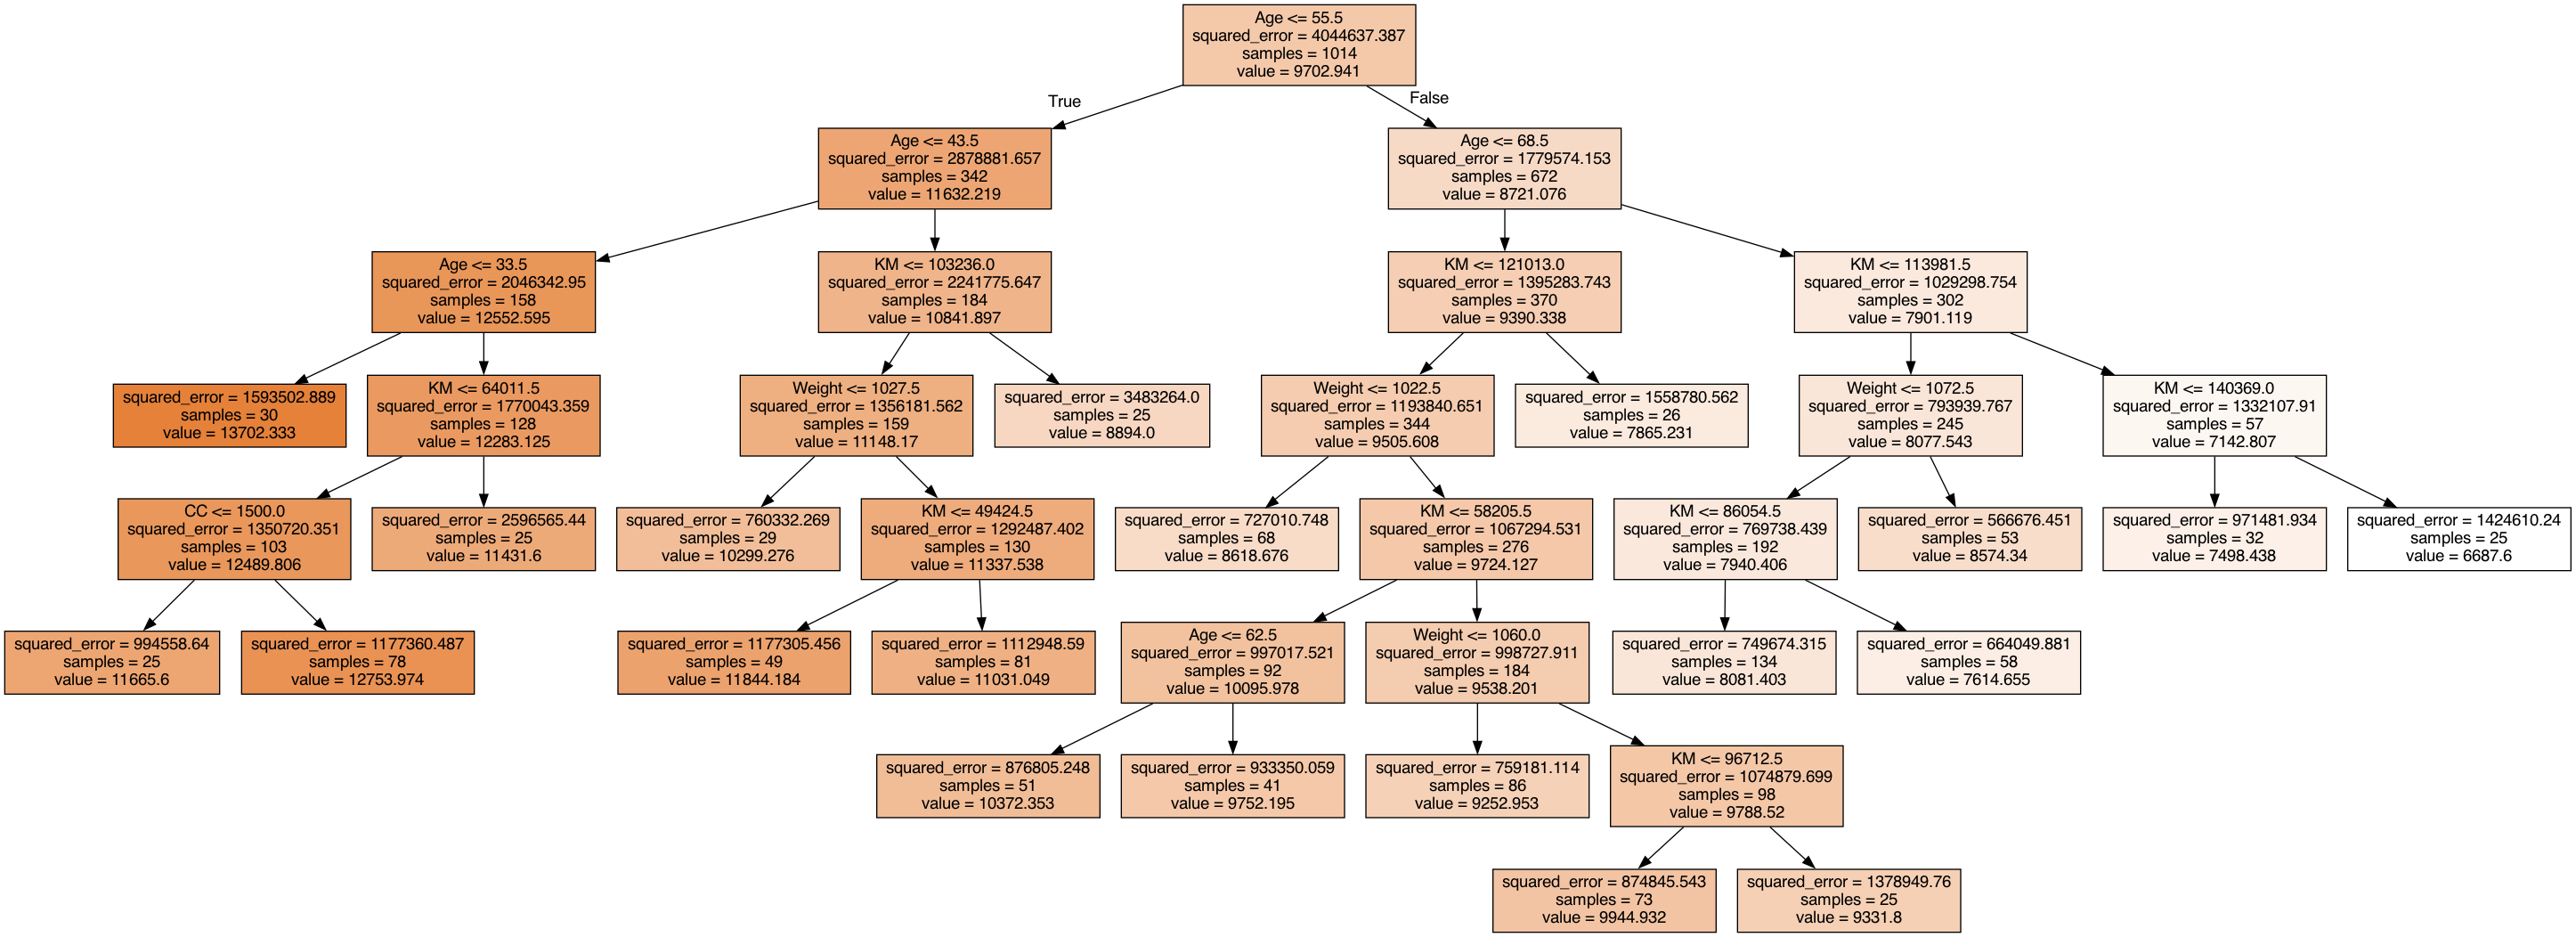

In [61]:
# png 파일을 Jupyter Notebook에 렌더링합니다.
Image(data = 'dtr2.png')

### 가지치기 후 회귀모형 특성 중요도

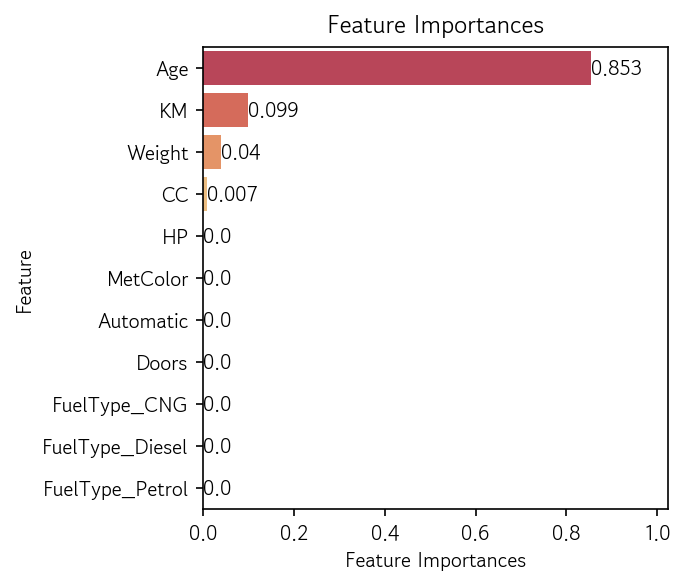

In [62]:
# 가지치기 후 회귀모형 특성 중요도로 막대 그래프를 그립니다.
hds.ml.plot_feature_importance(model = model, pal = 'Spectral')

### 회귀모형 성능 평가

In [63]:
# 가지치기 후 회귀모형의 검증셋 추정값을 생성합니다.
y_vpred2 = model.predict(X = X_valid)

In [64]:
# 가지치기 후 회귀모형의 성능지표를 출력합니다.
hds.stat.regmetrics(y_true = y_valid, y_pred = y_vpred2)

,MSE,RMSE,MSLE,RMSLE,MAE,MAPE
0,1.245994e+06,1116.241133,0.013905,0.117919,866.314712,0.09212


## End of Document